In [12]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = dataset.data
y = dataset.target
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.7)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_hat = dt_clf.predict(X_test)
acc = accuracy_score(y_hat,y_test)
acc


0.3

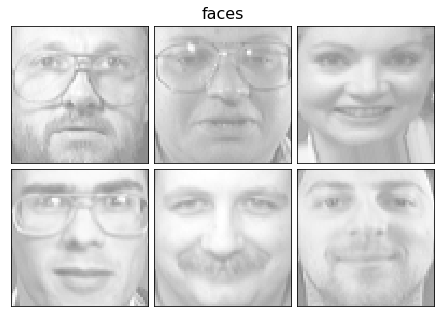

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
plot_gallery("faces", faces[:n_components])

### decomposition

In [8]:
from sklearn import decomposition

estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True)),
                       
    ('Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init='nndsvda', tol=5e-3)),

    ('Independent components - FastICA',
     decomposition.FastICA(n_components=n_components, whiten=True, max_iter=400)),

    ('Sparse comp. - MiniBatchSparsePCA',
     decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,
                                      n_iter=100, batch_size=3,
                                      random_state=rng)),

    ('MiniBatchDictionaryLearning',
        decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,
                                                  n_iter=50, batch_size=3,
                                                  random_state=rng)),

    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=100)),
]

Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.139s
Extracting the top 6 Non-negative components - NMF...
done in 0.421s
Extracting the top 6 Independent components - FastICA...
done in 0.381s
Extracting the top 6 Sparse comp. - MiniBatchSparsePCA...
done in 2.527s
Extracting the top 6 MiniBatchDictionaryLearning...
done in 1.994s
Extracting the top 6 Factor Analysis components - FA...
done in 1.073s


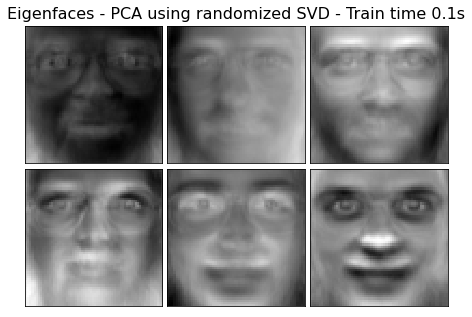

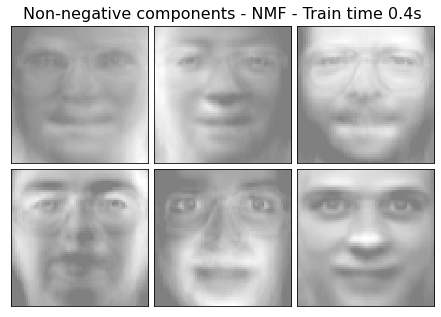

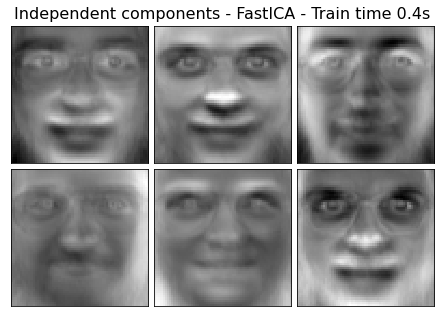

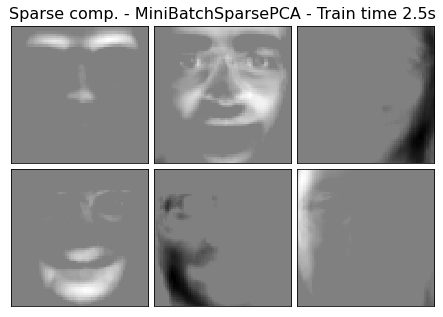

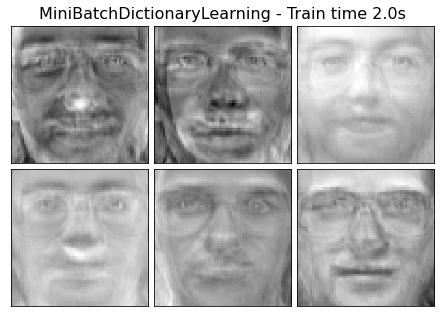

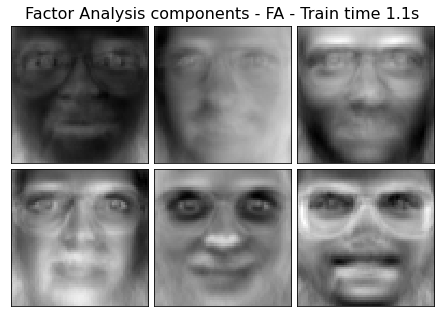

In [20]:
from time import time
for name, estimator in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()
    data = faces
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])


In [21]:
df_clf = DecisionTreeClassifier()
t0 = time()
dt_clf.fit(X,y)
train_time = (time() -t0)
print('done in %.3fs' % train_time)

done in 4.143s
